In [350]:
import pandas as pd
import os
import datetime as dt

In [351]:
file_list = os.listdir('36 month Degree day')
df = pd.read_csv('36 month Degree day/' + file_list[0])
for i in range(1,len(file_list)):
    df = pd.merge(df, pd.read_csv('36 month Degree day/' + file_list[i]), on = 'Date',how='inner')
    df['avg_temp'] = df.iloc[:,1:].mean(axis=1)
df = df[['Date','avg_temp']]

/var/folders/3g/lmg4c_3972zdk1mkgwq6qhk80000gn/T/ipykernel_27379/1317020089.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Temp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, pd.read_csv('36 month Degree day/' + file_list[i]), on = 'Date',how='inner')
/var/folders/3g/lmg4c_3972zdk1mkgwq6qhk80000gn/T/ipykernel_27379/1317020089.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Temp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, pd.read_csv('36 month Degree day/' + file_list[i]), on = 'Date',how='inner')
/var/folders/3g/lmg4c_3972zdk1mkgwq6qhk80000gn/T/ipykernel_27379/1317020089.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Temp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, pd.read_csv('36 month Degree day/' + file_list[i]), on = 'Date',how='inner')
/var/fo

In [352]:
corn = pd.read_excel('commodity_prices.xlsx', sheet_name='C 1 (Corn)')[['Date','Last Price']]
corn.rename(columns={'Last Price':'Corn'}, inplace=True)
def converter(s):
    parts = s.split()
    integer_part = int(parts[0])
    fraction_part = eval(parts[1])
    result = integer_part + fraction_part
    return result
corn['Corn'] = corn['Corn'].apply(lambda x: converter(x) if ' ' in str(x) else x)

In [353]:
corn['Date'] = corn['Date'].apply(lambda x: str(x))
def convert_date_string(date_str):
    dt_obj = dt.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    new_date_str = dt_obj.strftime('%m/%d/%y')
    return new_date_str
corn['Date'] = corn['Date'].apply(lambda x: convert_date_string(x))
corn = corn.iloc[::-1]

In [354]:
from datetime import datetime
import time
def convert_date_string(date_str):
    time_struct = time.strptime(date_str, '%m/%d/%y')
    dt_obj = datetime(*time_struct[:6])
    new_date_str = dt_obj.strftime('%m/%d/%y')
    return new_date_str
df['Date'] = df['Date'].apply(lambda x: convert_date_string(x))

In [355]:
df = pd.merge(corn, df, on = 'Date',how='inner')

In [356]:
df['Corn returns'] = df['Corn'].pct_change()
df['Corn cumulative returns'] = (1 + df['Corn returns']).cumprod()
df['avg_temp MA'] = df['avg_temp'].rolling(10).mean()
df['upper'] = df['avg_temp MA'] + .2 * df['avg_temp'].rolling(10).std()
df['lower'] = df['avg_temp MA'] - .2 * df['avg_temp'].rolling(10).std()
df['correlation'] = df['Corn'].rolling(25).corr(df['avg_temp'])

In [357]:
df['signal'] = 0
df.loc[df['avg_temp'] > df['upper'], 'signal'] = -1
df.loc[df['avg_temp'] < df['lower'], 'signal'] = 1
df.loc[df['correlation'] > -.5, 'signal'] = 0
df['signal'] = df['signal'].shift(1)

In [358]:
df['signal returns'] = df['signal'] * df['Corn returns']
df['signal cumulative returns'] = (1 + df['signal returns']).cumprod()

<AxesSubplot: >

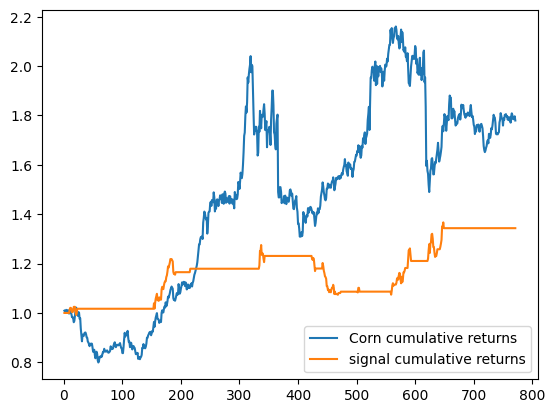

In [359]:
df[['Corn cumulative returns','signal cumulative returns']].plot()
